# S02 T05 Exploració de les dades

### Exercici 1

Descarrega el [data set Airlines Delay: Airline](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses) on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
# Asignem el dataset a una variable i llegim les primeres 5 files

import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


df = pd.read_csv('./dataset/Airlines_Delay_2008.csv', delimiter=",", decimal=".", encoding ='unicode_escape')
df.head(3)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Llistem les variables que conté el dataset

df_variables  = pd.read_excel(io = './dataset/variable_descriptions_excel.xlsx')
print(df_variables)

                 Name                                        Description
0                Year                                          1987-2008
1               Month                                             12-Jan
2          DayofMonth                                             31-Jan
3           DayOfWeek                            1 (Monday) - 7 (Sunday)
4             DepTime                actual departure time (local, hhmm)
5          CRSDepTime             scheduled departure time (local, hhmm)
6             ArrTime                  actual arrival time (local, hhmm)
7          CRSArrTime               scheduled arrival time (local, hhmm)
8       UniqueCarrier                                unique carrier code
9           FlightNum                                      flight number
10            TailNum                                  plane tail number
11  ActualElapsedTime                                         in minutes
12     CRSElapsedTime                              

## Preparant el dataset

In [2]:
carrier = pd.read_csv('./dataset/carriers.csv', delimiter=",", decimal=".", encoding ='unicode_escape')
carrier.head(5)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [3]:
carrier_columns = list(carrier.columns)
carrier2_columns = ['COD_OP', 'AEROLINIA']

zip_columns = dict(zip(carrier_columns, carrier2_columns))
carrier.rename(columns = zip_columns, inplace=True)
print(carrier.head(5))

  COD_OP                      AEROLINIA
0    02Q                  Titan Airways
1    04Q             Tradewind Aviation
2    05Q            Comlux Aviation, AG
3    06Q  Master Top Linhas Aereas Ltd.
4    07Q            Flair Airlines Ltd.


In [4]:
# Esborrem les columnes que considerem menys rellevants per analisis estadístic
df.drop(['TailNum', 'TaxiIn', 'TaxiOut'], axis = 1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  Cancelled          int64  
 19  CancellationCode   object 
 20  Diverted           int64  
 21  CarrierDelay       float64
 22  WeatherDelay       float64
 23  NASDelay           float64
 24  SecurityDelay      float64
 25  LateAircraftDelay 

In [5]:
# Convertim el type int64 a int32 i float64 a float32 per optimitzar el rendiment

df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int32  
 1   Month              int32  
 2   DayofMonth         int32  
 3   DayOfWeek          int32  
 4   DepTime            float32
 5   CRSDepTime         int32  
 6   ArrTime            float32
 7   CRSArrTime         int32  
 8   UniqueCarrier      object 
 9   FlightNum          int32  
 10  ActualElapsedTime  float32
 11  CRSElapsedTime     float32
 12  AirTime            float32
 13  ArrDelay           float32
 14  DepDelay           float32
 15  Origin             object 
 16  Dest               object 
 17  Distance           int32  
 18  Cancelled          int32  
 19  CancellationCode   object 
 20  Diverted           int32  
 21  CarrierDelay       float32
 22  WeatherDelay       float32
 23  NASDelay           float32
 24  SecurityDelay      float32
 25  LateAircraftDelay 

In [13]:
# Mostrem si hi ha valors duplicats i valors nuls (=Nan)
print('Número de entrades duplicades\n', df.duplicated().sum() )
print('Número de valors nuls:\n', df.isna().sum())

# Eliminem les files duplicades
df.drop_duplicates()
df.dropna(how='all', axis = 1)

print('\nTenim un total de {} entrades.\n'.format(len(df)) )

Número de entrades duplicades
 4
Número de valors nuls:
 Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

Tenim un total de 2389217 entrades.



In [6]:
# Canviem els noms de les columnes per noms més descriptius

df1_columns = list(df.columns)

df2_columns = ['ANO', 'MES', 'DIA', 'SEMANA', 'HR_SALIDA', 'HP_SALIDA', 'HR_LLEGADA', 
               'HP_LLEGADA', 'COD_OP', 'NUM_VUELO', 'DURACION', 'DURACION_EST', 'TIEMPO_VUELO', 
               'RET_LLEGADA', 'RET_SALIDA', 'COD_ORIGEN', 'COD_DESTINO', 'DISTANCIA', 'CANCELADO', 'COD_CANCEL',
               'DESVIADO', 'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION']

zip_columns = dict(zip(df1_columns, df2_columns))
df.rename(columns = zip_columns, inplace=True)
print(df.head(3))

    ANO  MES  DIA  SEMANA  HR_SALIDA  HP_SALIDA  HR_LLEGADA  HP_LLEGADA  \
0  2008    1    3       4     1343.0       1325      1451.0        1435   
1  2008    1    3       4     1125.0       1120      1247.0        1245   
2  2008    1    3       4     2009.0       2015      2136.0        2140   

  COD_OP  NUM_VUELO  ...  COD_DESTINO  DISTANCIA  CANCELADO  COD_CANCEL  \
0     WN        588  ...          LIT        393          0         NaN   
1     WN       1343  ...          MAF        441          0         NaN   
2     WN       3841  ...          MAF        441          0         NaN   

   DESVIADO RET_OP RET_CLIMA  RET_CNATU  RET_SEG RET_AVION  
0         0   16.0       0.0        0.0      0.0       0.0  
1         0    NaN       NaN        NaN      NaN       NaN  
2         0    NaN       NaN        NaN      NaN       NaN  

[3 rows x 26 columns]


### Exercici 2

Fes un informe complet del data set:.

- Resumeix estadísticament les columnes d’interès
- Troba quantes dades faltants hi ha per columna
- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
- Taula de les aerolínies amb més endarreriments acumulats
- Quins són els vols més llargs? I els més endarrerits?
- Etc.

### Analisis exploratorio

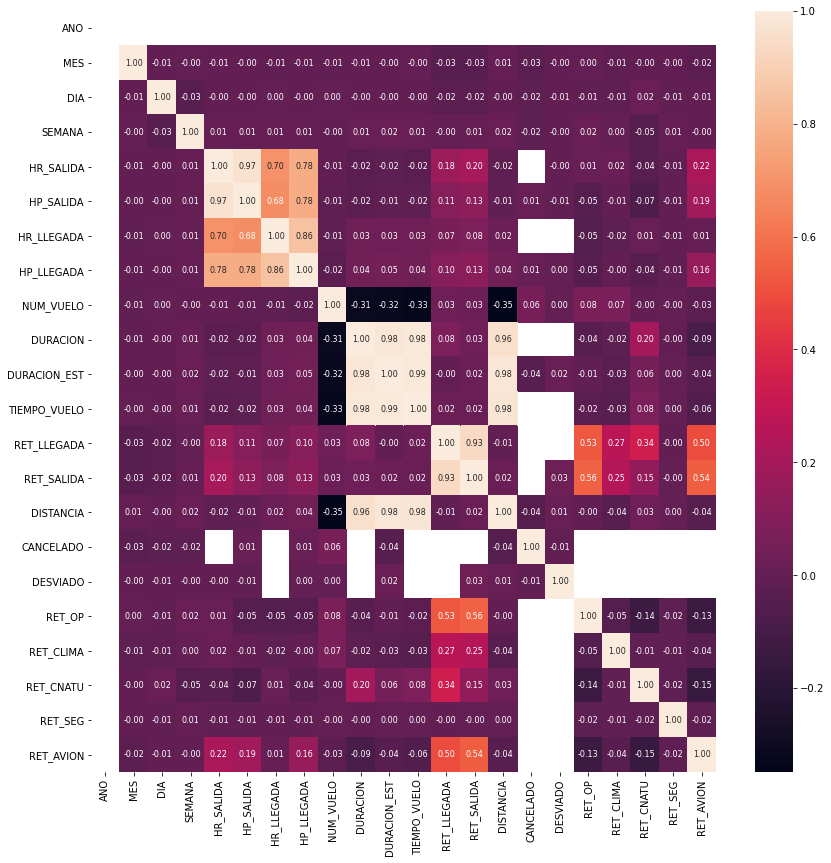

In [31]:
#Matriz de correlacion

corr_df = df.corr(method='pearson')

plt.figure(figsize=(14, 14))
sns.heatmap(corr_df, annot=True, fmt='.2f', annot_kws={'size': 8})
plt.show()

Veïem correlacions fortes entre 'HR_SALIDA' i 'HP_SALIDA' amb 'HR_LLDEGADA' i 'HP_LLEGADA', como era d'esperar. Per altre banda, no existeix una correlació entre 'CANCELADO' amb cap de les causes de RETARD ('RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION'), obviament, ya que si el vol está cancelat no pot produir retard. També, observem una forta correlació entre les variables 'DISTANCIA' amb 'DURACIÓN', 'DURACION_EST' i 'TIEMPO_VUELO'. Y, per últim, destacar una correlació  moderada positiva de aprox. 0.5 aprox., tenim les variables: 'RET_SALIDA' i 'RET_LLEGADA' correlacionades amb les variables 'RET_OP' i 'RET_AVION'.

In [7]:
df_stat = df[['RET_LLEGADA', 'RET_SALIDA', 'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION' ]].describe().T
print(df_stat)

                 count       mean        std   min  25%  50%   75%     max
RET_LLEGADA  2319121.0  10.273676  39.555920 -91.0 -9.0  0.0  15.0  2461.0
RET_SALIDA   2324775.0  11.442591  36.548691 -92.0 -4.0  0.0  11.0  2467.0
RET_OP        584583.0  15.752957  40.075527   0.0  0.0  0.0  16.0  2436.0
RET_CLIMA     584583.0   2.938243  19.233011   0.0  0.0  0.0   0.0  1148.0
RET_CNATU     584583.0  16.158463  30.505213   0.0  0.0  5.0  20.0  1357.0
RET_SEG       584583.0   0.080459   1.740871   0.0  0.0  0.0   0.0   392.0
RET_AVION     584583.0  20.976709  38.666759   0.0  0.0  0.0  27.0  1254.0


In [8]:
# Funció que converteix les dades float en format hora
   
def convert_toTime(m):
    hrs_time = timedelta(hours = 0, minutes = m, seconds = 0)  
    hrs, resto = divmod(hrs_time.seconds, 3600) 
    mi, sec = divmod(resto, 60)    
    print(f" {hrs:02}:{mi:02}:{sec:02}")
    

# Mostrem en format time la mitja de les columnes del dataset df_stat:
for v in df_stat.mean():
    mi = convert_toTime(v)

 16:13:00
 00:11:05
 00:29:28
 23:33:51
 23:58:08
 00:00:42
 00:12:42
 03:25:00


RET_OP        9208911.0
RET_CLIMA     1717647.0
RET_CNATU     9445962.0
RET_SEG         47035.0
RET_AVION    12262628.0
dtype: float32


<AxesSubplot:>

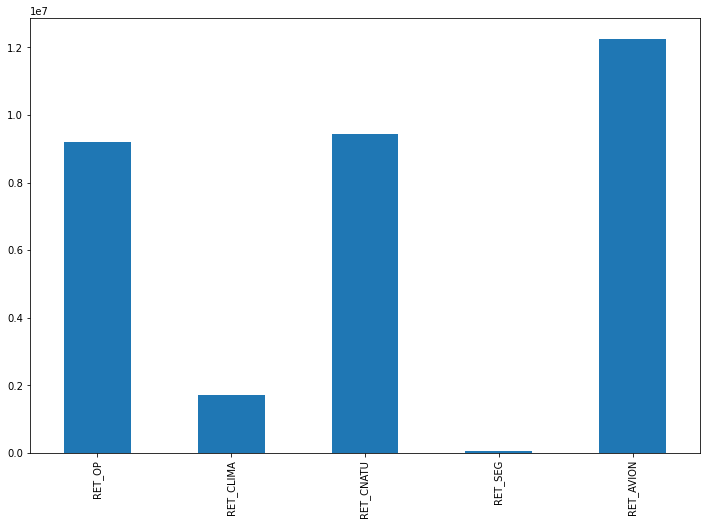

In [34]:
# Grafiquem les causes de retard. Quines d'elles té més incidència.

retard_sum = df[['RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION']].sum()
print(retard_sum)

plt.figure(figsize=(12,8))
retard_sum.plot.bar()

In [9]:
# agreguem el dataset carrier al principal i fem un merge de les columnes 'COD_OP', per conèixer el nom de la aerolinea 
# en questió

df_merged = pd.merge(df, carrier, how='left')
df_merged = df_merged[['ANO', 'MES', 'DIA', 'SEMANA', 'HR_SALIDA', 'HP_SALIDA', 'HR_LLEGADA',
       'HP_LLEGADA', 'COD_OP', 'AEROLINIA', 'NUM_VUELO', 'DURACION', 'DURACION_EST',
       'TIEMPO_VUELO', 'RET_LLEGADA', 'RET_SALIDA', 'COD_ORIGEN',
       'COD_DESTINO', 'DISTANCIA', 'CANCELADO', 'COD_CANCEL', 'DESVIADO',
       'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION']]
print(df_merged.head(3))

    ANO  MES  DIA  SEMANA  HR_SALIDA  HP_SALIDA  HR_LLEGADA  HP_LLEGADA  \
0  2008    1    3       4     1343.0       1325      1451.0        1435   
1  2008    1    3       4     1125.0       1120      1247.0        1245   
2  2008    1    3       4     2009.0       2015      2136.0        2140   

  COD_OP               AEROLINIA  ...  COD_DESTINO  DISTANCIA  CANCELADO  \
0     WN  Southwest Airlines Co.  ...          LIT        393          0   
1     WN  Southwest Airlines Co.  ...          MAF        441          0   
2     WN  Southwest Airlines Co.  ...          MAF        441          0   

   COD_CANCEL  DESVIADO  RET_OP RET_CLIMA RET_CNATU  RET_SEG  RET_AVION  
0         NaN         0    16.0       0.0       0.0      0.0        0.0  
1         NaN         0     NaN       NaN       NaN      NaN        NaN  
2         NaN         0     NaN       NaN       NaN      NaN        NaN  

[3 rows x 27 columns]


In [10]:
# Taula de les aerolínies amb més endarreriments acumulats

aerol_df= df_merged.groupby('AEROLINIA').agg({'RET_OP':'max'}).sort_values(by='RET_OP', ascending=False)
print(aerol_df)

                                                    RET_OP
AEROLINIA                                                 
Northwest Airlines Inc.                             2436.0
American Eagle Airlines Inc.                        1351.0
American Airlines Inc.                              1312.0
Pinnacle Airlines Inc.                              1094.0
United Air Lines Inc.                               1032.0
Continental Air Lines Inc.                          1001.0
Skywest Airlines Inc.                                990.0
Comair Inc.                                          955.0
Alaska Airlines Inc.                                 947.0
Atlantic Southeast Airlines                          940.0
Expressjet Airlines Inc.                             838.0
JetBlue Airways                                      834.0
Hawaiian Airlines Inc.                               785.0
Frontier Airlines Inc.                               703.0
Delta Air Lines Inc.                                 699

AEROLINIA
AirTran Airways Corporation                                                             640625.0
Alaska Airlines Inc.                                                                    212352.0
Aloha Airlines Inc.                                                                       5368.0
American Airlines Inc.                                                                 1297658.0
American Eagle Airlines Inc.                                                           1115514.0
Atlantic Southeast Airlines                                                             106018.0
Comair Inc.                                                                              67556.0
Continental Air Lines Inc.                                                              452980.0
Delta Air Lines Inc.                                                                    530722.0
Expressjet Airlines Inc.                                                                823609.0
Frontier Airlines In

<AxesSubplot:xlabel='AEROLINIA'>

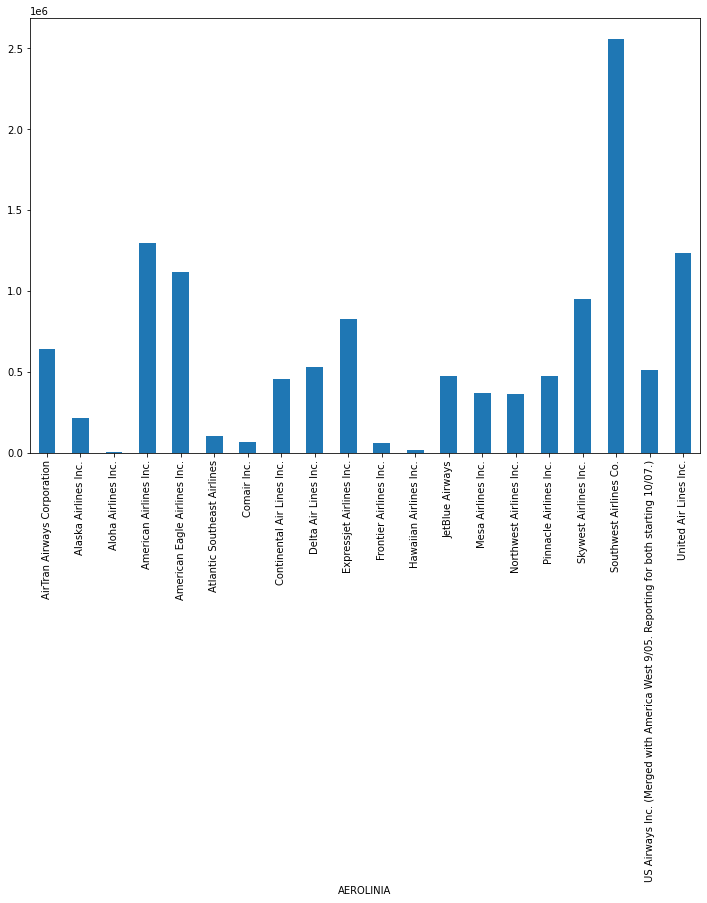

In [11]:
# Volem saber quina earolinea té més retards degut a averíes tècniques de l'avió

df_grouped = df_merged.groupby('AEROLINIA')['RET_AVION'].sum()
print(df_grouped)

plt.figure(figsize=(12, 8))
df_grouped.plot.bar()

In [12]:
# Ara necessitem saber el día de la setmana en el qua hi ha més retards
dia_unic = df['SEMANA'].unique()
print(dia_unic)

dia_dict = {1:"Domingo", 2:"Lunes", 3:"Martes", 4:"Miércoles", 5:"Jueves", 6:"Viernes", 7:"Sábado"}

df['DIA_SEMANA'] = df['SEMANA']
df['DIA_SEMANA'] = df['DIA_SEMANA'].map(dia_dict)
df['DIA_SEMANA'].value_counts(sort=True)

[4 5 6 7 1 2 3]


Martes       365560
Lunes        358942
Jueves       350566
Miércoles    349831
Domingo      347984
Sábado       328237
Viernes      288097
Name: DIA_SEMANA, dtype: int64

In [23]:
# % de vuelos desviados:

deviados_count = df.DESVIADO.value_counts()
print(deviados_count)

total_desviados = len(df.DESVIADO)
is_desviado = df.apply(lambda x: x['DESVIADO'] == 1, axis = 1).sum()
percent_desviados = ( is_desviado / total_desviados) * 100
print("\nEl porcentaje de vuelos desviados: {:.2f} ".format(percent_desviados))


0    2383563
1       5654
Name: DESVIADO, dtype: int64

El porcentaje de vuelos desviados: 0.24 


In [24]:
# % de vuelos cancelados:

cancel_count = df.CANCELADO.value_counts()
print(cancel_count)

total_cancel = len(df.CANCELADO)
is_cancel = df.apply(lambda x: x['CANCELADO'] == 1, axis = 1).sum()
percent_cancel = ( is_cancel / total_cancel) * 100
print("\nEl porcentaje de vuelos cancelados: {:.2f}".format(percent_cancel))


0    2324775
1      64442
Name: CANCELADO, dtype: int64

El porcentaje de vuelos cancelados: 2.70


In [13]:
# Convertim les milles a KMs

def convert_toKM(m):
    km = m * 1.609344
    print(round(km))
distan_max = df["DISTANCIA"].max()
distan_min = df["DISTANCIA"].min()
convert_toKM(distan_max)
convert_toKM(distan_min)

7986
27


In [14]:
# Estudiarem les aerolines que ténen els vols més llargs

# Fem un duplicat del dataframe princiapal perque no afecti les operacions o modificiacions 
df_distan = df_merged.copy()

dist_max = df_distan.groupby('AEROLINIA').agg({'DISTANCIA':'max'}).sort_values(by='DISTANCIA', ascending=False)
dist_max.apply(convert_toKM)


AEROLINIA
Continental Air Lines Inc.                                                             7986.0
Delta Air Lines Inc.                                                                   7245.0
United Air Lines Inc.                                                                  6828.0
American Airlines Inc.                                                                 6828.0
Northwest Airlines Inc.                                                                6392.0
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    4794.0
Hawaiian Airlines Inc.                                                                 4694.0
Alaska Airlines Inc.                                                                   4580.0
JetBlue Airways                                                                        4352.0
Aloha Airlines Inc.                                                                    4308.0
Southwest Airlines Co.                            

DISTANCIA    None
dtype: object

In [15]:
# Estudiarem els vols més llargs

vuelo_max = df_distan.groupby('NUM_VUELO').agg({'DISTANCIA':'max'}).sort_values(by='DISTANCIA', ascending=False)
vuelo_max.apply(convert_toKM)

NUM_VUELO
14      7986.0
15      7986.0
851     7245.0
850     7245.0
1282    7245.0
         ...  
6062     108.0
6188     108.0
5069     103.0
4986     103.0
9002      48.0
Name: DISTANCIA, Length: 7269, dtype: float64


DISTANCIA    None
dtype: object

In [16]:
# Unim ambues taules i tenim les aerolinees i els vols més llargs

df_max = df_distan.groupby(['NUM_VUELO','AEROLINIA']).agg({'DISTANCIA':'max'}).sort_values(by='DISTANCIA', ascending=False).reset_index()
df_max


,NUM_VUELO,AEROLINIA,DISTANCIA
0,15,Continental Air Lines Inc.,4962
1,14,Continental Air Lines Inc.,4962
2,850,Delta Air Lines Inc.,4502
3,851,Delta Air Lines Inc.,4502
4,1273,Delta Air Lines Inc.,4502
...,...,...,...
23315,5457,Skywest Airlines Inc.,49
23316,5458,Skywest Airlines Inc.,49
23317,5514,Skywest Airlines Inc.,49
23318,9002,JetBlue Airways,30


In [17]:
# les aerolínes i els vols més endarrerits:
# Cal sumar tots els retards. Una opció, seria sumar les variables 'RET_LLEGADA' i 'RET_SALIDA' i no ens importen les causes, 
# ya que estarien incloses en els retards de sortida + retards d'arribada. O, unaltre opció, es sumar les column es de tots els 
# retards:  'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION'.

# Treballarem la primera opció:

df_distan['TOTAL_RET'] = df_distan['RET_LLEGADA'] + df_distan['RET_SALIDA' ]


ret_max = df_distan.groupby(['NUM_VUELO','AEROLINIA']).agg({'TOTAL_RET':'max'}).sort_values(by= 'TOTAL_RET', ascending=False).reset_index()
ret_max


,NUM_VUELO,AEROLINIA,TOTAL_RET
0,1699,Northwest Airlines Inc.,4920.0
1,808,Northwest Airlines Inc.,4918.0
2,1472,Northwest Airlines Inc.,3087.0
3,1743,Northwest Airlines Inc.,2980.0
4,2093,American Airlines Inc.,2891.0
...,...,...,...
23315,6444,Skywest Airlines Inc.,NaN
23316,6468,Skywest Airlines Inc.,NaN
23317,6641,Skywest Airlines Inc.,NaN
23318,6849,Skywest Airlines Inc.,NaN


**Calcular la velocitat:**

La velocitat (v) és una cantitat vectorial que medeix el desplaçament (o el canvi en la posició, Δs) sobre el canvi en el temps (Δt), representada per l'ecuació:
**v = Δs/Δt**.

In [18]:
# Afegirem una columna que correspongui a la velocitat de cada un dels vols. Les unitats seràn, milles x minuts.

df_distan['VEL_VUELO'] = df_distan['DISTANCIA'] / df_distan['TIEMPO_VUELO' ]

# Veïem els vols que han sigut més ràpits:

vel_max = df_distan.groupby(['NUM_VUELO','AEROLINIA']).agg({'VEL_VUELO':'min'}).sort_values(by= 'VEL_VUELO', ascending=True).reset_index()
vel_max


,NUM_VUELO,AEROLINIA,VEL_VUELO
0,5215,Comair Inc.,0.500000
1,173,Hawaiian Airlines Inc.,0.560440
2,5200,Comair Inc.,0.600000
3,7340,Mesa Airlines Inc.,0.688525
4,4235,Atlantic Southeast Airlines,0.731034
...,...,...,...
23315,6444,Skywest Airlines Inc.,NaN
23316,6468,Skywest Airlines Inc.,NaN
23317,6641,Skywest Airlines Inc.,NaN
23318,6849,Skywest Airlines Inc.,NaN


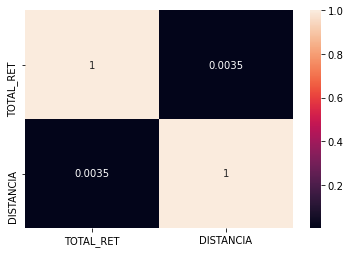

In [32]:
# Volem respondre a la pregunta si els vols més llargs són els més enderrerits y si la velocitat está relacionada.

max_dist =  df_distan.loc[:,['TOTAL_RET','DISTANCIA']]
correlation_var = max_dist.corr() 
sns.heatmap(correlation_var, annot = True) 
plt.show()


S'observa que la variable 'DISTANCIA' no está correlacionada amb la variable 'TOTAL_RET'. Es a dir, que en els vols llargs no necessariament es produeixen el retards més grans  

In [19]:
# Legim el ddataset dels aeroports:

df_airports = pd.read_csv('./dataset/airports.csv', sep=',', encoding='utf8', index_col=0)
df_airports.head(3)

,airport,city,state,country,lat,long
iata,,,,,,
00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893


In [20]:
print(df_airports.columns)
df_airports.drop(['state', 'lat', 'long'], axis = 1, inplace=True)

Index(['airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')


In [21]:
airports_columns = list(df_airports.columns)
airports2_columns = ['AEROPUERTO', 'CIUDAD', 'PAIS']

zip_columns = dict(zip(airports_columns, airports2_columns))
df_airports.rename(columns = zip_columns, inplace=True)
print(df_airports.head(3))
print('\nTenim un total de {} entrades.\n'.format(len(df_airports)) )
print(df_airports['AEROPUERTO'].value_counts())

                AEROPUERTO            CIUDAD PAIS
iata                                             
00M               Thigpen        Bay Springs  USA
00R   Livingston Municipal        Livingston  USA
00V            Meadow Lake  Colorado Springs  USA

Tenim un total de 3376 entrades.

Municipal            5
Monroe County        5
Jackson County       5
Lancaster            4
Franklin County      4
                    ..
Wahoo Municipal      1
Gratiot Community    1
Danville Regional    1
Cashmere-Dryden      1
Clover               1
Name: AEROPUERTO, Length: 3245, dtype: int64


In [22]:
# Mapejem les seguests columnes:

aero_origi = df_distan['COD_ORIGEN'].map(df_airports['AEROPUERTO'])
aero_desti = df_distan['COD_DESTINO'].map(df_airports['AEROPUERTO'])

city_origi = df_distan['CIUDAD_ORIGEN'] = df_distan['COD_ORIGEN'].map(df_airports['CIUDAD'])
city_desti = df_distan['CIUDAD_DESTINO'] = df_distan['COD_DESTINO'].map(df_airports['CIUDAD'])

df_distan.columns


Index(['ANO', 'MES', 'DIA', 'SEMANA', 'HR_SALIDA', 'HP_SALIDA', 'HR_LLEGADA',
       'HP_LLEGADA', 'COD_OP', 'AEROLINIA', 'NUM_VUELO', 'DURACION',
       'DURACION_EST', 'TIEMPO_VUELO', 'RET_LLEGADA', 'RET_SALIDA',
       'COD_ORIGEN', 'COD_DESTINO', 'DISTANCIA', 'CANCELADO', 'COD_CANCEL',
       'DESVIADO', 'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION',
       'TOTAL_RET', 'VEL_VUELO', 'CIUDAD_ORIGEN', 'CIUDAD_DESTINO'],
      dtype='object')

In [23]:
# Creem les noves columnes mapeades:

df_distan['AERO_ORIGEN'] = aero_origi
df_distan['AERO_DESTINO'] = aero_desti

df_distan['CIUDAD_ORIGEN'] = city_origi
df_distan['CIUDAD_DESTINO'] = city_desti

df_distan.columns

Index(['ANO', 'MES', 'DIA', 'SEMANA', 'HR_SALIDA', 'HP_SALIDA', 'HR_LLEGADA',
       'HP_LLEGADA', 'COD_OP', 'AEROLINIA', 'NUM_VUELO', 'DURACION',
       'DURACION_EST', 'TIEMPO_VUELO', 'RET_LLEGADA', 'RET_SALIDA',
       'COD_ORIGEN', 'COD_DESTINO', 'DISTANCIA', 'CANCELADO', 'COD_CANCEL',
       'DESVIADO', 'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION',
       'TOTAL_RET', 'VEL_VUELO', 'CIUDAD_ORIGEN', 'CIUDAD_DESTINO',
       'AERO_ORIGEN', 'AERO_DESTINO'],
      dtype='object')

In [24]:
# Comprobem les duplicitats en les columnes mapejades:

comprovar = df_distan[['COD_ORIGEN', 'COD_DESTINO', 'CIUDAD_ORIGEN', 'CIUDAD_DESTINO', 'AERO_ORIGEN', 'AERO_DESTINO']]
comprovar

,COD_ORIGEN,COD_DESTINO,CIUDAD_ORIGEN,CIUDAD_DESTINO,AERO_ORIGEN,AERO_DESTINO
0,HOU,LIT,Houston,Little Rock,William P Hobby,Adams
1,HOU,MAF,Houston,Midland,William P Hobby,Midland International
2,HOU,MAF,Houston,Midland,William P Hobby,Midland International
3,HOU,MCO,Houston,Orlando,William P Hobby,Orlando International
4,HOU,MCO,Houston,Orlando,William P Hobby,Orlando International
...,...,...,...,...,...,...
2389212,BOS,CVG,Boston,Covington,Gen Edw L Logan Intl,Cincinnati Northern Kentucky Intl
2389213,CVG,BOS,Covington,Boston,Cincinnati Northern Kentucky Intl,Gen Edw L Logan Intl
2389214,BOS,CVG,Boston,Covington,Gen Edw L Logan Intl,Cincinnati Northern Kentucky Intl
2389215,CVG,BOS,Covington,Boston,Cincinnati Northern Kentucky Intl,Gen Edw L Logan Intl


In [25]:
df_distan.drop(columns=['COD_ORIGEN', 'COD_DESTINO'], inplace=True)


In [26]:
df_distan.columns

Index(['ANO', 'MES', 'DIA', 'SEMANA', 'HR_SALIDA', 'HP_SALIDA', 'HR_LLEGADA',
       'HP_LLEGADA', 'COD_OP', 'AEROLINIA', 'NUM_VUELO', 'DURACION',
       'DURACION_EST', 'TIEMPO_VUELO', 'RET_LLEGADA', 'RET_SALIDA',
       'DISTANCIA', 'CANCELADO', 'COD_CANCEL', 'DESVIADO', 'RET_OP',
       'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVION', 'TOTAL_RET',
       'VEL_VUELO', 'CIUDAD_ORIGEN', 'CIUDAD_DESTINO', 'AERO_ORIGEN',
       'AERO_DESTINO'],
      dtype='object')

### Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

In [50]:
!pip install openpyxl

In [ ]:
df_new = df_distan.groupby('AEROLINIA')[['NUM_VUELO', 'TIEMPO_VUELO', 'RET_LLEGADA', 'RET_SALIDA',
       'DISTANCIA']]

In [ ]:
df_new.to_csv('Airlines_Delay_2008.csv', index = False, sep = ';')

L'arxiu que volem exportar a excel Té moltes observaciones i no és possible sempre i quan no configurem el format de sortida del excel en varies fulles (sheet). En aquest cas opto per no exportar la totalitat de observaciones del dataset. 

In [ ]:
group_df = list(df_new)

with pd.ExcelWriter('Airlines_Delay_2008.xlsx') as writer:
    for i in range(0, len(group_df)):
        aero = group_df[i][0]
        
        if len(aero) > 10: aero = aero[:10] + "..."
        aero_df = group_df[i][1]
        aero_df.to_excel(writer, sheet_name=aero, index=False)
